1. Data Preprocessing

1.1. Importing data

In [1]:
import pandas as pd

# read csv file
df = pd.read_csv('ARIMA-dataset.csv')
# print first 5 rows of data
df.head()

,time,lat,lon,dev_acc_d
0,2022-03-19 15:12:54,35.724380,51.386521,0.00000
1,2022-03-19 15:12:59,35.723492,51.385984,0.00000
2,2022-03-19 15:13:04,35.723234,51.386712,0.07172
3,2022-03-19 15:13:09,35.723138,51.387657,0.15773
4,2022-03-19 15:13:14,35.723082,51.388778,0.25916


In [2]:
# use isnull() and sum() to count the number of null values in each column
null_counts = df.isnull().sum()
print(null_counts)

time            0
lat             0
lon             0
dev_acc_d    1564
dtype: int64


In [3]:
df.shape

(47091, 4)

In [4]:
def make_dev_acc_d_full_null(data_frame):

    data_dev_acc_d = data_frame['dev_acc_d']
    new_list = []
    item_before_null = False
    number_null = 0
    see_last_item = None
    for item in data_dev_acc_d:

        if pd.isna(item):
            item_before_null = True
            number_null += 1

        elif not item_before_null:
            new_list.append(item)
            see_last_item = item

        else:
            item_before_null = False
            item_must_add = (item - see_last_item)/number_null
            for rank in range(number_null):
                new_list.append(item_must_add*(rank+1)+see_last_item)

            number_null = 0
            see_last_item = item
            new_list.append(item)

    data_frame['dev_acc_d'] = new_list
    return data_frame


In [5]:
res = make_dev_acc_d_full_null(df)

res.head(10)

,time,lat,lon,dev_acc_d
0,2022-03-19 15:12:54,35.724380,51.386521,0.00000
1,2022-03-19 15:12:59,35.723492,51.385984,0.00000
2,2022-03-19 15:13:04,35.723234,51.386712,0.07172
3,2022-03-19 15:13:09,35.723138,51.387657,0.15773
4,2022-03-19 15:13:14,35.723082,51.388778,0.25916
5,2022-03-19 15:13:19,35.723146,51.389878,0.35871
6,2022-03-19 15:13:24,35.723140,51.390991,0.45923
7,2022-03-19 15:13:29,35.723128,51.392059,0.55567
8,2022-03-19 15:13:34,35.723242,51.393003,0.64194
9,2022-03-19 15:13:39,35.723536,51.393891,0.72845


In [6]:
res.to_csv('res.csv')

In [7]:
null_counts = res.isnull().sum()
print(null_counts)

time         0
lat          0
lon          0
dev_acc_d    0
dtype: int64


In [19]:
def find_distance_from_latitude_longitude(dataframe):

    lat = dataframe['lat']
    lon = dataframe['lon']

    x_be = lat[0]
    y_be = lon[0]
    list_dis = [0]
    for i in range(1,len(lat)):
        distance = ((lat[i]-x_be)**2 + (lon[i]-y_be)**2)**0.5
        list_dis.append(distance)
        x_be = lat[i]
        y_be = lon[i]

    dataframe['Euclidean_distance'] = list_dis
    return dataframe

In [8]:
def distance_for_each_day(data_frame):

    data_dev_acc_d = data_frame['dev_acc_d']
    new_list = []
    before_item = data_dev_acc_d[0]

    for item in data_dev_acc_d:

        new_list.append(item-before_item)

        before_item = item

    data_frame['distance_for_each_day'] = new_list
    return data_frame


In [9]:
res = distance_for_each_day(res)
res.head(10)


,time,lat,lon,dev_acc_d,distance_for_each_day
0,2022-03-19 15:12:54,35.724380,51.386521,0.00000,0.00000
1,2022-03-19 15:12:59,35.723492,51.385984,0.00000,0.00000
2,2022-03-19 15:13:04,35.723234,51.386712,0.07172,0.07172
3,2022-03-19 15:13:09,35.723138,51.387657,0.15773,0.08601
4,2022-03-19 15:13:14,35.723082,51.388778,0.25916,0.10143
5,2022-03-19 15:13:19,35.723146,51.389878,0.35871,0.09955
6,2022-03-19 15:13:24,35.723140,51.390991,0.45923,0.10052
7,2022-03-19 15:13:29,35.723128,51.392059,0.55567,0.09644
8,2022-03-19 15:13:34,35.723242,51.393003,0.64194,0.08627
9,2022-03-19 15:13:39,35.723536,51.393891,0.72845,0.08651


In [10]:
# convert time column to pandas datetime object
res['time'] = pd.to_datetime(res['time'])

In [11]:
# set the time column as the index
res.set_index('time', inplace=True)

<Axes: xlabel='time'>

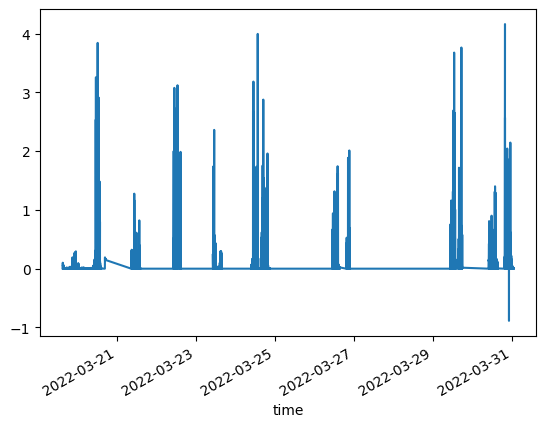

In [55]:
# plot the values column
daily_df = res.resample('D').sum()[['distance_for_each_day']]
weekly_df = res.resample('W').sum()[['distance_for_each_day']]
monthly_df = res.resample('M').sum()[['distance_for_each_day']]

res['distance_for_each_day'].plot()

<Axes: xlabel='time'>

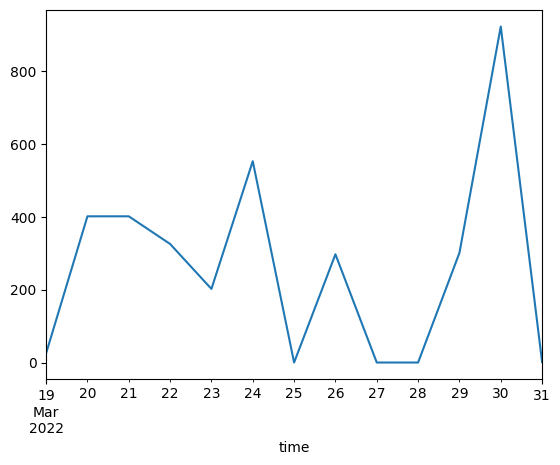

In [56]:
daily_df['distance_for_each_day'].plot()

<Axes: xlabel='time'>

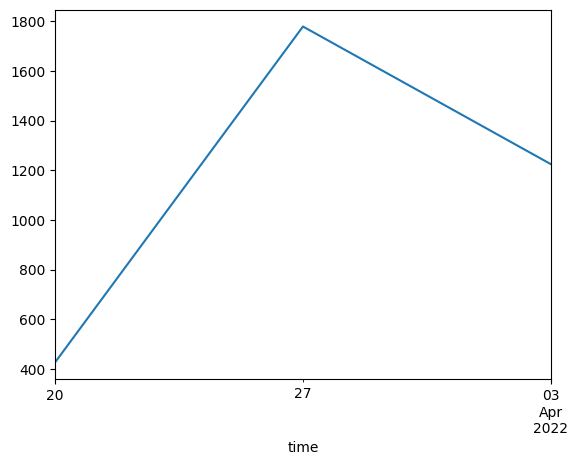

In [57]:
weekly_df['distance_for_each_day'].plot()

<Axes: xlabel='time'>

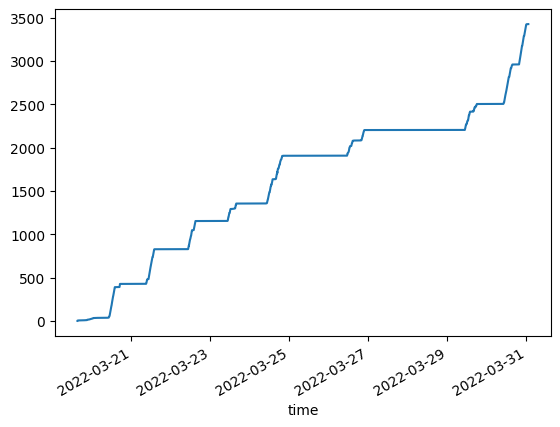

In [21]:
res['dev_acc_d'].plot()


<Axes: xlabel='time'>

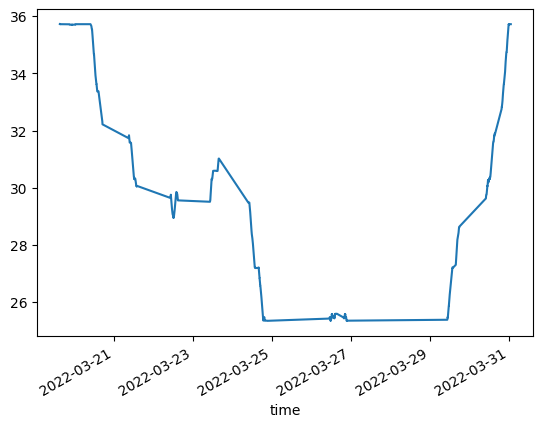

In [13]:
res['lat'].plot()
distance_for_each_day

<Axes: xlabel='time'>

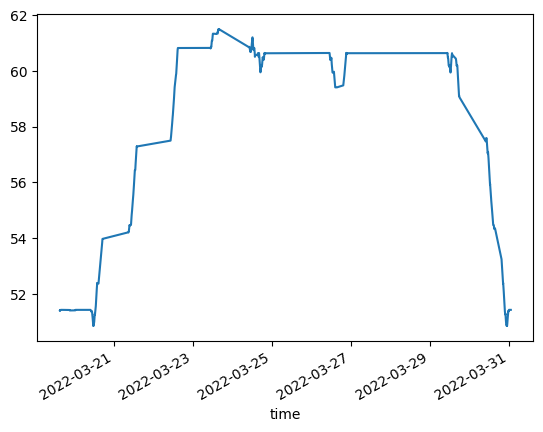

In [14]:
res['lon'].plot()


In [20]:
res = find_distance_from_latitude_longitude(res)
res.head()

,lat,lon,dev_acc_d,distance_for_each_day,Euclidean_distance
time,,,,,
2022-03-19 15:12:54,35.724380,51.386521,0.00000,0.00000,0.000000
2022-03-19 15:12:59,35.723492,51.385984,0.00000,0.00000,0.103799
2022-03-19 15:13:04,35.723234,51.386712,0.07172,0.07172,0.077219
2022-03-19 15:13:09,35.723138,51.387657,0.15773,0.08601,0.094992
2022-03-19 15:13:14,35.723082,51.388778,0.25916,0.10143,0.112258


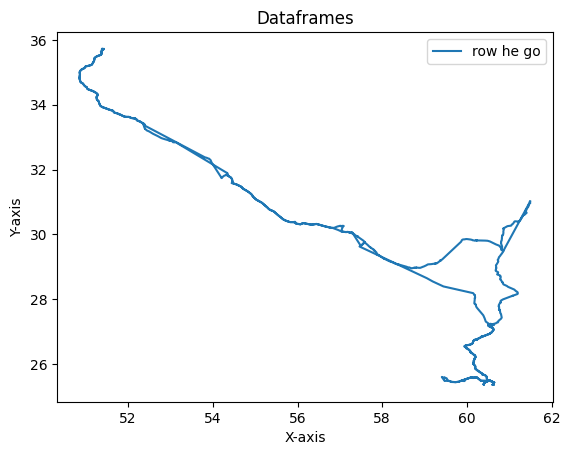

In [15]:
import matplotlib.pyplot as plt
# plot both dataframes on the same graph
plt.plot(res['lon'], res['lat'], label='row he go')

# add title and labels to the plot
plt.title('Dataframes')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# show the legend and the plot
plt.legend()
plt.show()

2. Determining the Parameters
. In ARIMA, we have three parameters p, d and q.
. Using the available dataset, estimate these parameters.

In [ ]:
d = 0

In [25]:
!pip install statsmodels


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [26]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

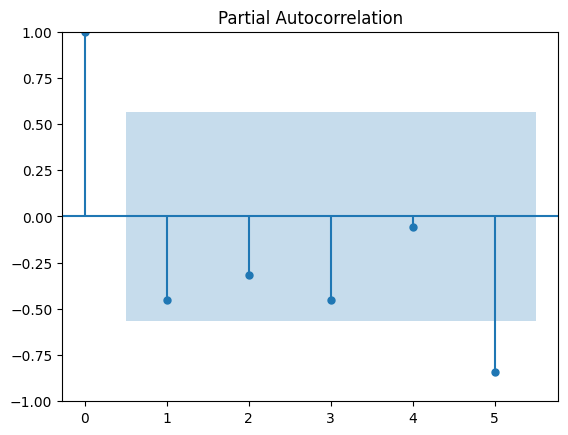

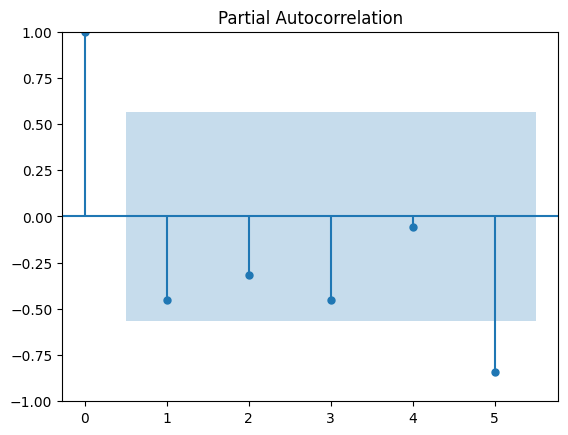

In [65]:
plot_pacf(daily_df.distance_for_each_day.diff().dropna(), lags=5)


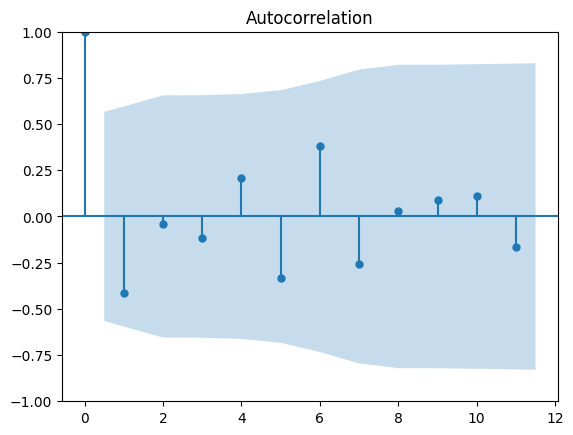

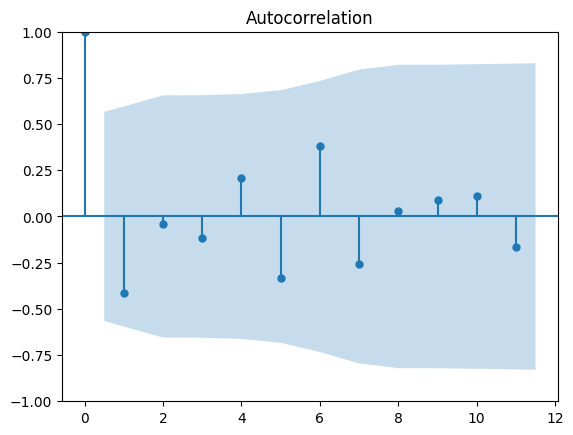

In [63]:
plot_acf(daily_df.distance_for_each_day.diff().dropna())


In [150]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(daily_df.distance_for_each_day, order = (3,0,3))
model_fit = model.fit()
model_fit.summary()

/home/mehdi/PycharmProjects/Hw_DataMinig/venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/mehdi/PycharmProjects/Hw_DataMinig/venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/mehdi/PycharmProjects/Hw_DataMinig/venv/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:     distance_for_each_day   No. Observations:                   13
Model:                    ARIMA(3, 0, 3)   Log Likelihood                 -89.378
Date:                   Fri, 24 Mar 2023   AIC                            194.756
Time:                           04:54:04   BIC                            199.276
Sample:                       03-19-2022   HQIC                           193.827
                            - 03-31-2022                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        257.8740      6.795     37.948      0.000     244.555     271.193
ar.L1         -1.0450      0.472     -2.214      0.027      -1.970      -0.120
ar.L2         -0.3901      0.446     -0.874      0.382      -1.265       0.485
ar.L3         -0.3447      0.218     -1.584      0.113      -0.771       0.082
ma.L1          0.9799   7985.002      0.000      1.000   -1.56e+04    1.57e+04
ma.L2         -0.9801   7983.096     -0.000      1.000   -1.56e+04    1.56e+04
ma.L3         -0.9998      0.561     -1.783      0.075      -2.099       0.099
sigma2      9660.2582      2.461   3925.127      0.000    9655.434    9665.082
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):                 0.39
Prob(Q):                              0.60   Prob(JB):                         0.82
Heteroskedasticity (H):               5.43   Skew:                            -0.25
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.01e+23. Standard errors may be unstable.
"""

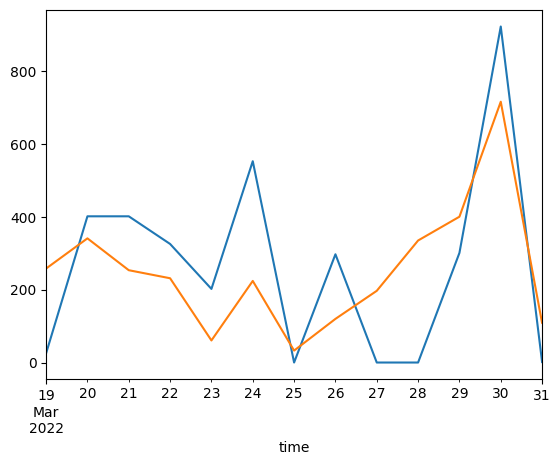

In [151]:
# Generate predictions
preds = model_fit.predict(start=0, end=len(daily_df.distance_for_each_day))

# Plot predictions
daily_df['distance_for_each_day'].plot()
plt.plot(preds)

plt.show()

In [119]:
!pip install pmdarima


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [140]:
daily_df

,distance_for_each_day
time,
2022-03-19,25.18467
2022-03-20,401.24335
2022-03-21,401.24449
2022-03-22,325.35858
2022-03-23,202.00294
2022-03-24,552.44416
2022-03-25,0.00000
2022-03-26,297.04221
2022-03-27,0.00000


In [145]:
len(daily_df)

13

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=124.898, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=123.927, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=124.094, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=130.776, Time=0.01 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.298 seconds


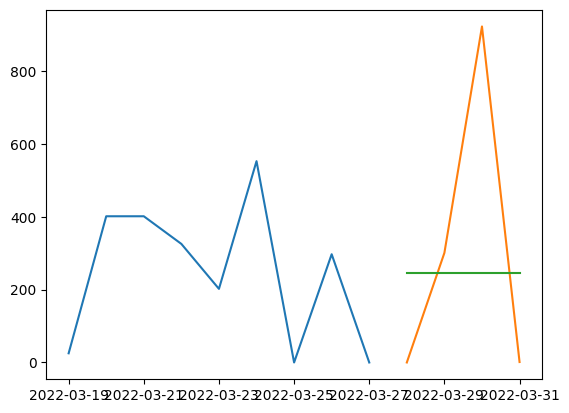

In [147]:
#building the model
from pmdarima.arima import auto_arima
train = daily_df.head(9)
valid = daily_df.tail(4)
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=4)
# print(forecast)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])
# print(forecast)
#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()